# Arc line templates for Shane Kast

In [3]:
# imports
from pkg_resources import resource_filename
from importlib import reload
from matplotlib import pyplot as plt
import os
import numpy as np
from scipy.io import readsav 

from astropy import units
from astropy.table import Table

from linetools import utils as ltu
from linetools.spectra import xspectrum1d as xspec

from pypeit import utils
from pypeit.core.wave import airtovac
from pypeit.core.wavecal import waveio
from pypeit.core.wavecal import autoid
from pypeit.core.wavecal import templates
from pypeit.spectrographs import util

## Blue grisms

### 452/3306

#### Load

In [4]:
xidl_dir = os.getenv('XIDL_DIR')

In [5]:
xidl_file = os.path.join(xidl_dir, 'Spec', 'Longslit', 'calib', 'linelists', 'kast_452_3306.sav')
xidl_dict = readsav(xidl_file)

In [11]:
npix = xidl_dict['archive_arc'].shape[0]
npix

2048

#### Build

In [14]:
reload(templates)
slit = 0
calib = xidl_dict['calib'][slit]
wv_air = templates.poly_val(calib['FFIT'], np.arange(npix), calib['NRM'])
wv_vac = airtovac(wv_air*units.AA)

#### Plot

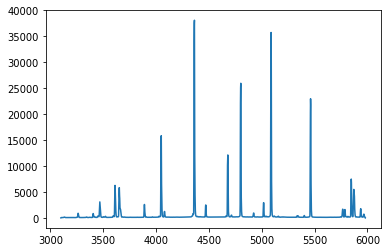

In [18]:
plt.clf()
ax=plt.gca()
ax.plot(wv_vac, xidl_dict['archive_arc'])
plt.show()

### 600/4310

#### Load

In [19]:
xidl_file = os.path.join(xidl_dir, 'Spec/Longslit/calib/linelists/kast_600_4310.sav')
xidl_dict = readsav(xidl_file)

In [20]:
nspec = xidl_dict['archive_arc'].shape[0]
npix = xidl_dict['archive_arc'].shape[1]
nspec, npix

(4, 2048)

In [21]:
xidl_dict['calib']['FUNC']

array([b'POLY', b'POLY', b'POLY', b'POLY'], dtype=object)

#### Check em

In [22]:
# Standard
slit = 0 # central
#slit = 3 # red
calib = xidl_dict['calib'][slit]
wv_air = templates.poly_val(calib['FFIT'], np.arange(npix),
                           calib['NRM'])
wv_vac = airtovac(wv_air*units.AA)

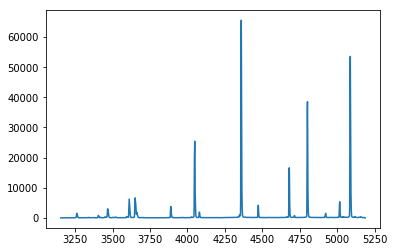

In [23]:
plt.clf()
ax=plt.gca()
ax.plot(wv_vac, xidl_dict['archive_arc'][slit])
plt.show()

### 830/3460

#### Load

In [25]:
xidl_file = os.path.join(xidl_dir, 'Spec/Longslit/calib/linelists/kast_830_3460.sav')
xidl_dict = readsav(xidl_file)

In [26]:
nspec = xidl_dict['archive_arc'].shape[0]
npix = xidl_dict['archive_arc'].shape[1]
nspec, npix

(2, 2048)

In [27]:
xidl_dict['calib']['FUNC']

array([b'POLY', b'POLY'], dtype=object)

#### Check em

In [28]:
# Standard
slit = 0 # bluer (not very blue)
#slit = 1 # a little redder
calib = xidl_dict['calib'][slit]
wv_air = templates.poly_val(calib['FFIT'], np.arange(npix),
                           calib['NRM'])
wv_vac = airtovac(wv_air*units.AA)
wv_vac[0]

<Quantity 3272.08285988 Angstrom>

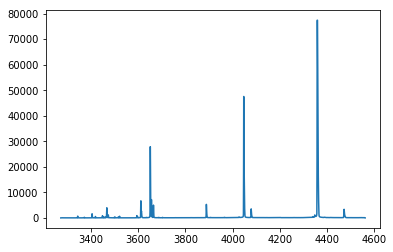

In [29]:
plt.clf()
ax=plt.gca()
ax.plot(wv_vac, xidl_dict['archive_arc'][slit])
plt.show()